In [1]:
sd<-read.csv("../Data_Project/서울대전5일(연휴앞뒤2일)_날짜.csv")
traffic <- read.csv("../Data_Project/서울대전+1-2종출구교통량.csv")
popCar <- read.csv("../Data_Project/인구수자동차수.csv")
price <- read.csv("../Data_Project/서울대전설날_소비자물가지수.csv")

popCar <- popCar[,-1]
popCar

sd <- cbind(sd, traffic[,5:6]) 
sd$날짜 <- as.Date(sd$날짜)
# sd <- sd[,-(5:7)]

sd$전국총지수 <- price$전국총지수

head(sd)
head(price)
str(sd)

년도,서울인구수,승용차,승합차,차합계
2013,10388055,2462515,156871,2619386
2014,10369593,2510742,149991,2660733
2015,10297138,2560154,141927,2702081
2016,10204057,2598344,134309,2732653
2017,10124579,2641190,127564,2768754
2018,10049607,2658637,120780,2779417
2019,10010983,2670803,114310,2785113
2020,9911088,2711984,106504,2818488


일차,출발시간,소요시간,날짜,눈비,X1종출구교통량합계,X2종출구교통량합계,전국총지수
0,0,91,2013-02-08,TRUE,11369763,523201,93.038
1,0,132,2013-02-09,TRUE,11369763,523201,93.038
2,0,83,2013-02-10,TRUE,11369763,523201,93.038
3,0,87,2013-02-11,TRUE,11369763,523201,93.038
4,0,84,2013-02-12,TRUE,11369763,523201,93.038
0,1,88,2013-02-08,TRUE,7518962,470000,93.038


일차,출발시간,소요시간,날짜,전국총지수
0,0,91,2013-02-08,93.038
1,0,132,2013-02-09,93.038
2,0,83,2013-02-10,93.038
3,0,87,2013-02-11,93.038
4,0,84,2013-02-12,93.038
0,1,88,2013-02-08,93.038


'data.frame':	960 obs. of  8 variables:
 $ 일차              : int  0 1 2 3 4 0 1 2 3 4 ...
 $ 출발시간          : int  0 0 0 0 0 1 1 1 1 1 ...
 $ 소요시간          : int  91 132 83 87 84 88 129 82 85 82 ...
 $ 날짜              : Date, format: "2013-02-08" "2013-02-09" ...
 $ 눈비              : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ X1종출구교통량합계: int  11369763 11369763 11369763 11369763 11369763 7518962 7518962 7518962 7518962 7518962 ...
 $ X2종출구교통량합계: int  523201 523201 523201 523201 523201 470000 470000 470000 470000 470000 ...
 $ 전국총지수        : num  93 93 93 93 93 ...


In [2]:
table(sd$일차)


  0   1   2   3   4 
192 192 192 192 192 

In [3]:
table(sd$출발시간)


 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 

In [4]:
table(sd$소요시간)


 73  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93 
  1   4   3   5   9  21  25  30  34  31  44  36  33  49  32  41  31  34  25  34 
 94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 
 24  14   9  14   8  10   7   5  14   6   7   4   5   7   6   3   3   6   6   6 
114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 
  4   4   4   3   8   4   2   6   2   5   5   4   2   6   4   5   1   4   2   8 
134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 
  3   2   2   2   2   7   1   4   3   4   6   4   4   4   4   5   5   1   3   3 
154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 
  3   4   5   3   4   1   5   1   3   2   2   3   3   3   3   1   3   2   2   1 
174 176 177 178 179 180 181 182 183 184 185 186 187 188 191 192 194 195 196 200 
  1   2   3   1   1   2   2   2   3   1   2   1   4   2   2   4   2   2   2   1 
201 202 203 205 206 207 211

In [5]:
str(sd)
summary(sd)
#소요시간 0인 데이터 어떻게 처리할지 

'data.frame':	960 obs. of  8 variables:
 $ 일차              : int  0 1 2 3 4 0 1 2 3 4 ...
 $ 출발시간          : int  0 0 0 0 0 1 1 1 1 1 ...
 $ 소요시간          : int  91 132 83 87 84 88 129 82 85 82 ...
 $ 날짜              : Date, format: "2013-02-08" "2013-02-09" ...
 $ 눈비              : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ X1종출구교통량합계: int  11369763 11369763 11369763 11369763 11369763 7518962 7518962 7518962 7518962 7518962 ...
 $ X2종출구교통량합계: int  523201 523201 523201 523201 523201 470000 470000 470000 470000 470000 ...
 $ 전국총지수        : num  93 93 93 93 93 ...


      일차      출발시간        소요시간          날짜           
 Min.   :0   Min.   : 0.00   Min.   : 73.0   Min.   :2013-02-08  
 1st Qu.:1   1st Qu.: 5.75   1st Qu.: 85.0   1st Qu.:2014-11-14  
 Median :2   Median :11.50   Median : 92.0   Median :2016-08-03  
 Mean   :2   Mean   :11.50   Mean   :108.3   Mean   :2016-08-07  
 3rd Qu.:3   3rd Qu.:17.25   3rd Qu.:121.0   3rd Qu.:2018-05-16  
 Max.   :4   Max.   :23.00   Max.   :251.0   Max.   :2020-01-27  
    눈비         X1종출구교통량합계  X2종출구교통량합계   전국총지수    
 Mode :logical   Min.   :  2580075   Min.   : 113501    Min.   : 93.04  
 FALSE:766       1st Qu.: 12580932   1st Qu.: 487433    1st Qu.: 94.44  
 TRUE :194       Median : 31836282   Median :1130798    Median : 96.50  
                 Mean   : 35221511   Mean   :1504996    Mean   : 96.59  
                 3rd Qu.: 43657415   3rd Qu.:2154046    3rd Qu.: 98.97  
                 Max.   :159476871   Max.   :5104871    Max.   :100.09  

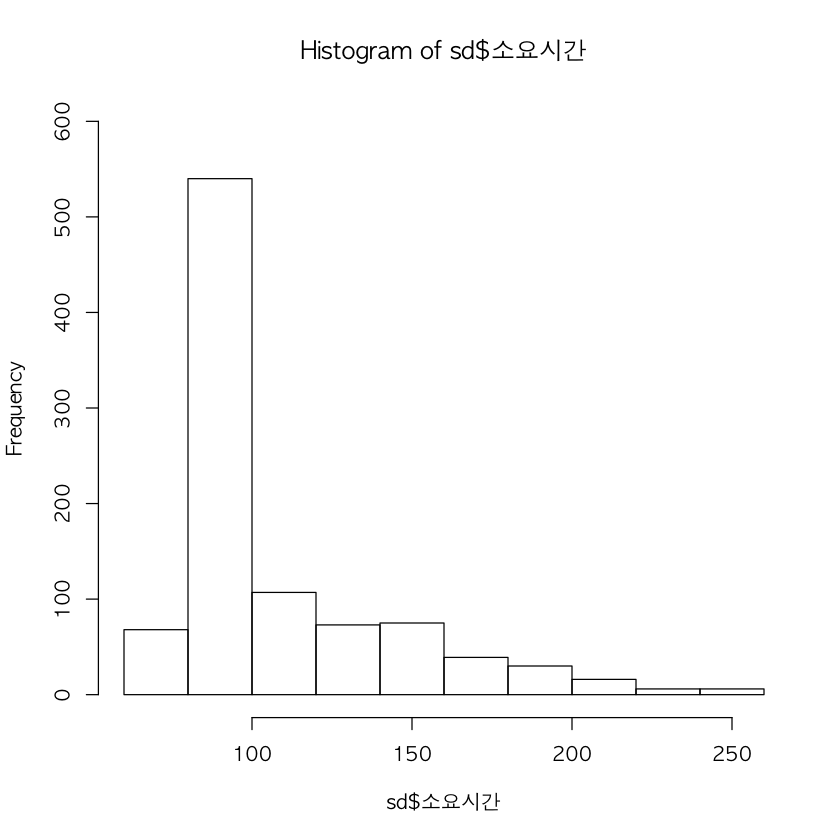

In [6]:
options(warn = -1)
par(family = "AppleGothic")
hist(sd$소요시간,
    ylim=c(0,600))

In [7]:
train<-sd
head(train)

일차,출발시간,소요시간,날짜,눈비,X1종출구교통량합계,X2종출구교통량합계,전국총지수
0,0,91,2013-02-08,TRUE,11369763,523201,93.038
1,0,132,2013-02-09,TRUE,11369763,523201,93.038
2,0,83,2013-02-10,TRUE,11369763,523201,93.038
3,0,87,2013-02-11,TRUE,11369763,523201,93.038
4,0,84,2013-02-12,TRUE,11369763,523201,93.038
0,1,88,2013-02-08,TRUE,7518962,470000,93.038


In [8]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [9]:
samp<-createDataPartition(train$소요시간,p=0.7,list=F)

In [10]:
data.train<-train[samp,]
str(data.train)

'data.frame':	675 obs. of  8 variables:
 $ 일차              : int  0 1 2 3 4 0 2 3 4 0 ...
 $ 출발시간          : int  0 0 0 0 0 1 1 1 1 2 ...
 $ 소요시간          : int  91 132 83 87 84 88 82 85 82 88 ...
 $ 날짜              : Date, format: "2013-02-08" "2013-02-09" ...
 $ 눈비              : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ X1종출구교통량합계: int  11369763 11369763 11369763 11369763 11369763 7518962 7518962 7518962 7518962 5250235 ...
 $ X2종출구교통량합계: int  523201 523201 523201 523201 523201 470000 470000 470000 470000 496078 ...
 $ 전국총지수        : num  93 93 93 93 93 ...


In [11]:
data.test<-train[-samp,]
str(data.test)

'data.frame':	285 obs. of  8 variables:
 $ 일차              : int  1 1 2 3 4 0 3 2 3 0 ...
 $ 출발시간          : int  1 2 2 2 2 4 4 5 5 6 ...
 $ 소요시간          : int  129 121 102 89 78 91 85 106 81 96 ...
 $ 날짜              : Date, format: "2013-02-09" "2013-02-09" ...
 $ 눈비              : logi  TRUE TRUE TRUE FALSE FALSE TRUE ...
 $ X1종출구교통량합계: int  7518962 5250235 5250235 5250235 5250235 4975804 4975804 10667595 10667595 23601930 ...
 $ X2종출구교통량합계: int  470000 496078 496078 496078 496078 874748 874748 1498576 1498576 2654556 ...
 $ 전국총지수        : num  93 93 93 93 93 ...


In [12]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [13]:
rf<- randomForest(소요시간~.,data=data.train,ntree=500)

In [14]:
x<-subset(data.test,select=-소요시간)
y<-data.test$소요시간

In [15]:
pred<-predict(rf,x)
test<-data.frame(data.test$일차,data.test$출발시간,pred,y,ifelse((pred-pred*0.15<y&y<pred+pred*0.15),"true","false"))

In [16]:
head(test)

,data.test.일차,data.test.출발시간,pred,y,ifelse..pred...pred...0.15...y...y...pred...pred...0.15....true...
7,1,1,119.90686,129,true
12,1,2,118.41035,121,true
13,2,2,88.99115,102,true
14,3,2,85.82734,89,true
15,4,2,84.63377,78,true
21,0,4,94.31061,91,true


In [17]:
colnames(test)<-c("일자","출발시간","pred","y","bool")
head(test)
table(test$bool)

,일자,출발시간,pred,y,bool
7,1,1,119.90686,129,true
12,1,2,118.41035,121,true
13,2,2,88.99115,102,true
14,3,2,85.82734,89,true
15,4,2,84.63377,78,true
21,0,4,94.31061,91,true



false  true 
   56   229 

In [18]:
#총 row 갯수
nrow(test)

[1] 285

In [19]:
#맞춘 row 갯수
sum(test$bool=="true")

[1] 229

In [20]:
#예측률 
sum(test$bool=="true")/nrow(test)

[1] 0.8035088

In [21]:
# table(test)